In [1]:
import pandas as pd
import os

main_folder = '/Volumes/G Drive/enertalk/00'

# Create a dictionary to store the appliance data
appliance_data = {}

# Iterate over subfolders in the main folder
for subfolder in os.listdir(main_folder):
    if subfolder == '.DS_Store':
        continue

    subfolder_path = os.path.join(main_folder, subfolder)

    if not os.path.isdir(subfolder_path):
        continue

    try:
        # Load the washing machine data
        washing_machine_files = [file for file in os.listdir(subfolder_path) if 'washing-machine' in file and file.endswith('.parquet.gzip')]
        for file in washing_machine_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            washing_machine_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = washing_machine_data

        # Load the rice cooker data
        rice_cooker_files = [file for file in os.listdir(subfolder_path) if 'rice-cooker' in file and file.endswith('.parquet.gzip')]
        for file in rice_cooker_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            rice_cooker_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = rice_cooker_data

        # Load the total data
        total_files = [file for file in os.listdir(subfolder_path) if 'total' in file and file.endswith('.parquet.gzip')]
        for file in total_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            total_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = total_data

        # Load the TV data
        tv_files = [file for file in os.listdir(subfolder_path) if 'TV' in file and file.endswith('.parquet.gzip')]
        for file in tv_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            tv_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = tv_data

        # Load the microwave data
        microwave_files = [file for file in os.listdir(subfolder_path) if 'microwave' in file and file.endswith('.parquet.gzip')]
        for file in microwave_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            microwave_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = microwave_data

        # Load the water purifier data
        water_pur_files = [file for file in os.listdir(subfolder_path) if 'water-purifier' in file and file.endswith('.parquet.gzip')]
        for file in water_pur_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            water_pur_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = water_pur_data

        # Load the fridge data
        fridge_files = [file for file in os.listdir(subfolder_path) if 'fridge' in file and file.endswith('.parquet.gzip')]
        for file in fridge_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            fridge_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = fridge_data
            
        kimchi_fridge_files = [file for file in os.listdir(subfolder_path) if 'kimchi-fridge' in file and file.endswith('.parquet.gzip')]
        for file in kimchi_fridge_files:
            kimchi_fridge_path = os.path.join(subfolder_path, file)
            kimchi_fridge_data = pd.read_parquet(kimchi_fridge_path)
            # Store the kimchi fridge data in the dictionary with the appliance name
            appliance_name = file.split('_')[1].split('.')[0]
            appliance_data[appliance_name] = kimchi_fridge_data

    except FileNotFoundError as e:
        # Handle the case when a file is not found
        print(f"Skipping folder {subfolder}: {e}")
        continue


In [2]:
# Create a list of appliance_data and appliance_names
appliance_data = [fridge_data, microwave_data, tv_data, washing_machine_data, rice_cooker_data, water_pur_data, kimchi_fridge_data]
appliance_names = ['fridge', 'microwave', 'tv', 'washing_machine', 'rice_cooker', 'water_pur', 'kimchi_fridge']

# Iterate over the appliance_data and perform the join operation
for i, appliance in enumerate(appliance_data):
    # Rename the columns of the specific appliance dataset
    appliance.columns = [appliance_names[i] + '_active_power', appliance_names[i] + '_reactive_power', 'timestamp']
    
    # Join the total_data with the specific appliance dataset on 'timestamp' column
    appliance_data[i] = total_data.merge(appliance, on='timestamp')
    appliance_data[i].rename(columns={'active_power': 'total_active_power', 'reactive_power': 'total_reactive_power'}, inplace=True)
    appliance_data[i] = appliance_data[i].dropna()
    if i == 0:
        fridge_data = appliance_data[i]
        fridge_data = fridge_data.set_index('timestamp')
    elif i == 1:
        microwave_data = appliance_data[i]
        microwave_data = microwave_data.set_index('timestamp')
    elif i == 2:
        tv_data = appliance_data[i]
        tv_data = tv_data.set_index('timestamp')
    elif i == 3:
        washing_machine_data = appliance_data[i]
        washing_machine_data = washing_machine_data.set_index('timestamp')
    elif i == 4:
        rice_cooker_data = appliance_data[i]
        rice_cooker_data = rice_cooker_data.set_index('timestamp')
    elif i == 5:
        water_pur_data = appliance_data[i]
        water_pur_data = water_pur_data.set_index('timestamp')
    elif i == 6:
        kimchi_fridge_data = appliance_data[i]
        kimchi_fridge_data = kimchi_fridge_data.set_index('timestamp')



In [3]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score



# Define the list of target columns for each appliance
target_columns = [
    ['fridge_active_power', 'fridge_reactive_power'],
    ['microwave_active_power', 'microwave_reactive_power'],
    ['tv_active_power', 'tv_reactive_power'],
    ['washing_machine_active_power', 'washing_machine_reactive_power'],
    ['rice_cooker_active_power', 'rice_cooker_reactive_power'],
    ['water_pur_active_power', 'water_pur_reactive_power'],
    ['kimchi_fridge_active_power', 'kimchi_fridge_reactive_power']
]

train_data = []
test_data = []

# Split each dataset into train and test sets
for dataset in appliance_data:
    dataset_test_size = int(0.2 * len(dataset))
    dataset_test_indx = len(dataset) - dataset_test_size
    dataset_test = dataset.iloc[dataset_test_indx:].set_index('timestamp')
    dataset_train = dataset.iloc[:dataset_test_indx].set_index('timestamp')
    
    train_data.append(dataset_train)
    test_data.append(dataset_test)

fridge_train, microwave_train, tv_train, washing_machine_train, rice_cooker_train, water_pur_train, kimchi_fridge_train = train_data
fridge_test, microwave_test, tv_test, washing_machine_test, rice_cooker_test, water_pur_test, kimchi_fridge_test = test_data


In [9]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


class Hart85:
    def __init__(self, num_states=2, num_cluster_init=10, num_cycles_init=5, num_cluster=2):
        self.num_states = num_states
        self.num_cluster_init = num_cluster_init
        self.num_cycles_init = num_cycles_init
        self.num_cluster = num_cluster
        self.model = None

    def train(self, X):
        X = self.create_input(X)
        self.model = self.train_hart85(X)
        return self.model

    def create_input(self, X):
        n_samples, n_features = X.shape
        X_agg = np.zeros((n_samples, self.num_states))
        for i in range(n_samples):
            for j in range(self.num_states):
                X_agg[i, j] = np.sum(X[i, j * (n_features // self.num_states):(j + 1) * (n_features // self.num_states)])
        return X_agg

    def train_hart85(self, X):
        num_samples, num_features = X.shape
        X_states = np.zeros((num_samples, num_features))
        means = KMeans(n_clusters=self.num_cluster_init).fit(X).cluster_centers_
        knn = NearestNeighbors(n_neighbors=self.num_cluster_init).fit(X)
        for i in range(num_samples):
            _, indices = knn.kneighbors([X[i]])
            for j in range(self.num_cycles_init):
                for k in range(num_features):
                    if j < len(indices[0]):
                        if indices[0][j] < len(means):
                            X_states[i, k] = means[indices[0][j]][k]
        return X_states

    def disaggregate(self, X):
        n_samples, n_features = X.shape
        X_agg = self.create_input(X)
        n_cycles = self.num_cluster // self.num_cycles_init
        Y = np.zeros((n_samples, n_features * n_cycles))
        means = KMeans(n_clusters=self.num_cluster).fit(X_agg).cluster_centers_
        knn = NearestNeighbors(n_neighbors=self.num_cluster).fit(X_agg)
        for i in range(n_samples):
            _, indices = knn.kneighbors([X_agg[i]])
            for j in range(n_cycles):
                for k in range(self.num_cycles_init):
                    if indices[0][j * self.num_cycles_init + k] < len(means):
                        Y[i, j * self.num_cycles_init + k] = means[indices[0][j * self.num_cycles_init + k]][k]
        return Y

    def calculate_rmse(self, X_true, X_pred):
        return np.sqrt(mean_squared_error(X_true, X_pred))

    def calculate_mae(self, X_true, X_pred):
        return mean_absolute_error(X_true, X_pred)

    def calculate_rmae(self, X_true, X_pred):
        rmse = self.calculate_rmse(X_true, X_pred)
        return rmse / np.mean(X_true)

    def calculate_mse(self, X_true, X_pred):
        return mean_squared_error(X_true, X_pred)

    
total_features = ['total_active_power', 'total_reactive_power']
fridge_features = ['fridge_active_power', 'fridge_reactive_power']
washing_machine_features = ['washing_machine_active_power', 'washing_machine_reactive_power']
microwave_features = ['microwave_active_power', 'microwave_reactive_power']
rice_cooker_features = ['rice_cooker_active_power','rice_cooker_reactive_power']
tv_features = ['tv_active_power','tv_reactive_power']
water_pur_features = ['water_pur_active_power','water_pur_reactive_power']
kimchi_fridge_features = ['kimchi_fridge_active_power', 'kimchi_fridge_reactive_power']

## FRIDGE ##

X_train_fridge, X_test_fridge, Y_train_fridge, Y_test_fridge = fridge_train[total_features].values, fridge_test[total_features].values, fridge_train[fridge_features].values, fridge_test[fridge_features].values

hart85_disaggregator_fridge = Hart85(num_states=2, num_cluster_init=124, num_cycles_init=2, num_cluster=2)
hart85_disaggregator_fridge.train(X_train_fridge)

disaggregated_data_fridge = hart85_disaggregator_fridge.disaggregate(X_test_fridge)

for i, feature in enumerate(fridge_features):
    true_values = Y_test_fridge[:, i]
    pred_values = disaggregated_data_fridge[:, i]
    
    rmse = hart85_disaggregator_fridge.calculate_rmse(true_values, pred_values)
    mse = hart85_disaggregator_fridge.calculate_mse(true_values, pred_values)
    rmae = hart85_disaggregator_fridge.calculate_rmae(true_values, pred_values)
    mae = hart85_disaggregator_fridge.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for fridge_active_power:
RMSE: 42.9113190769669
MSE: 1841.381304925263
RMAE: 5.330986163789155
MAE: 8.134017402195527
R2: -0.0711469227603232

Metrics for fridge_reactive_power:
RMSE: 20.185907532022163
MSE: 407.4708628913491
RMAE: -49.517634089476736
MAE: 6.266759887207309
R2: -0.001387977418980224



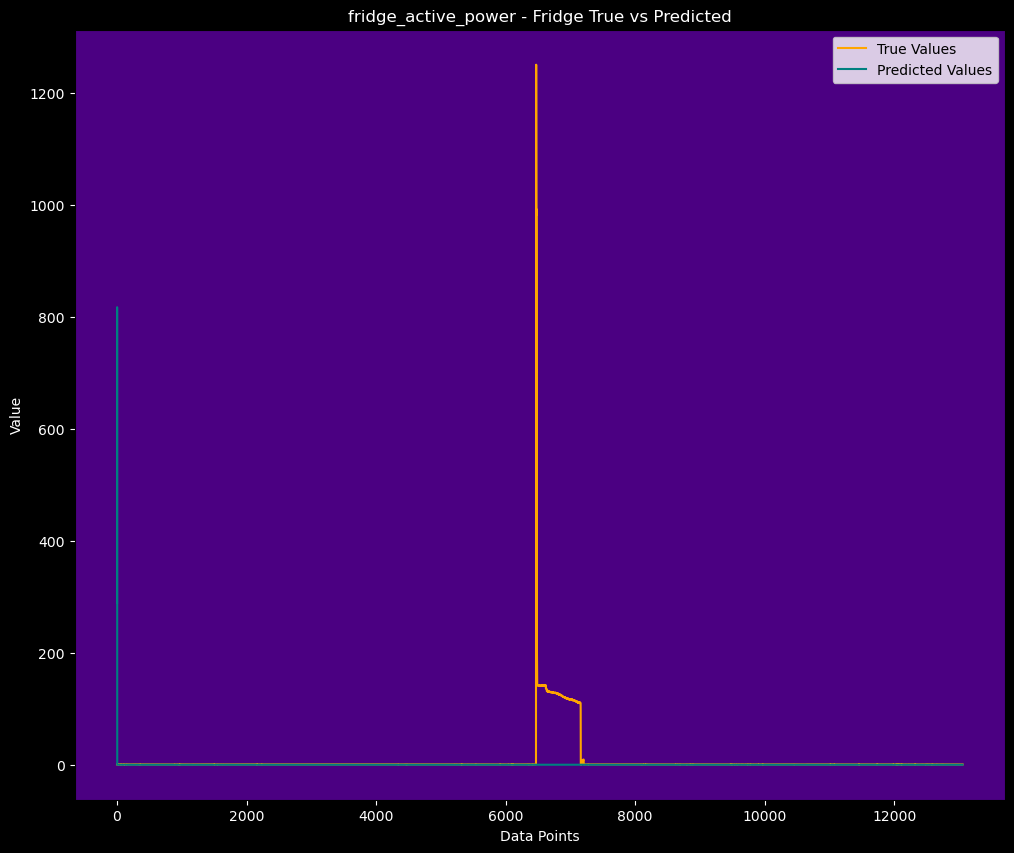

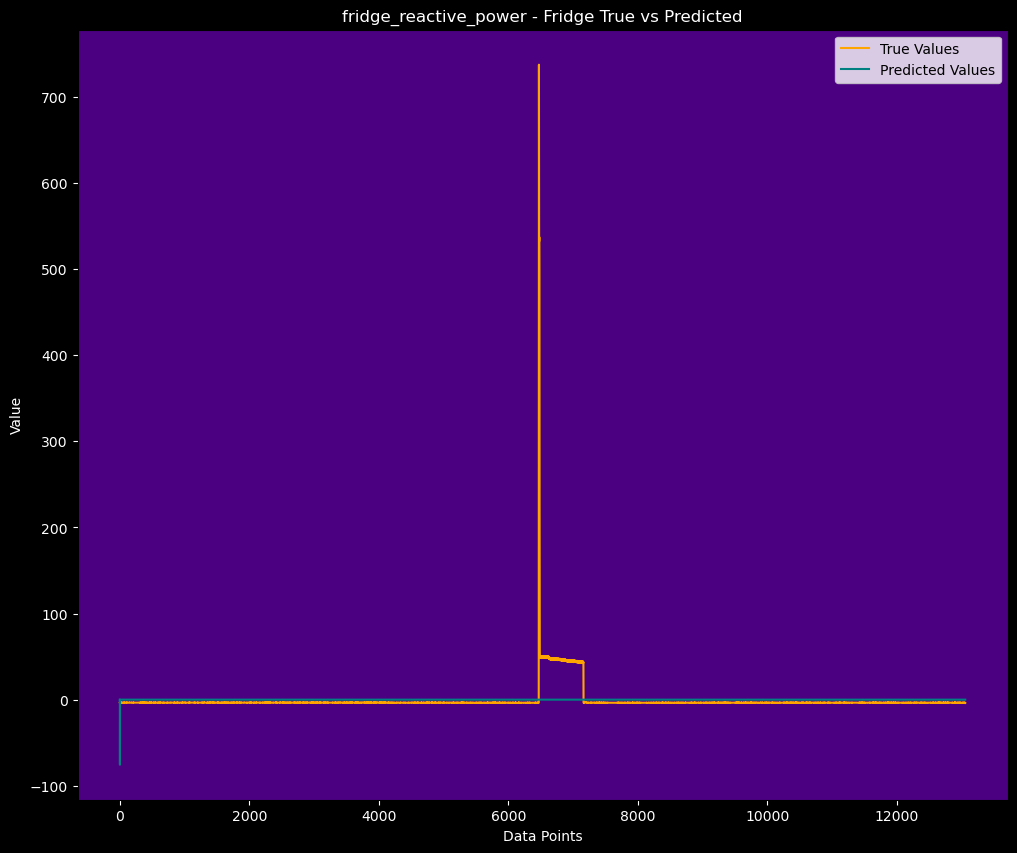

In [11]:
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_fridge.shape[1]):
    column_name = fridge_features[i]
    column_true = Y_test_fridge[:, i]
    column_pred = disaggregated_data_fridge[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='teal')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - Fridge True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('indigo')
    
    plt.show()

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for washing_machine_active_power:
RMSE: 770.5896488510587
MSE: 593808.4069163979
RMAE: 2.320955476698439
MAE: 332.2237813399392
R2: -0.22904579929924296

Metrics for washing_machine_reactive_power:
RMSE: 17.768358176073786
MSE: 315.7145522732482
RMAE: -7.468233272909491
MAE: 13.020646934240727
R2: -0.028765217233024165



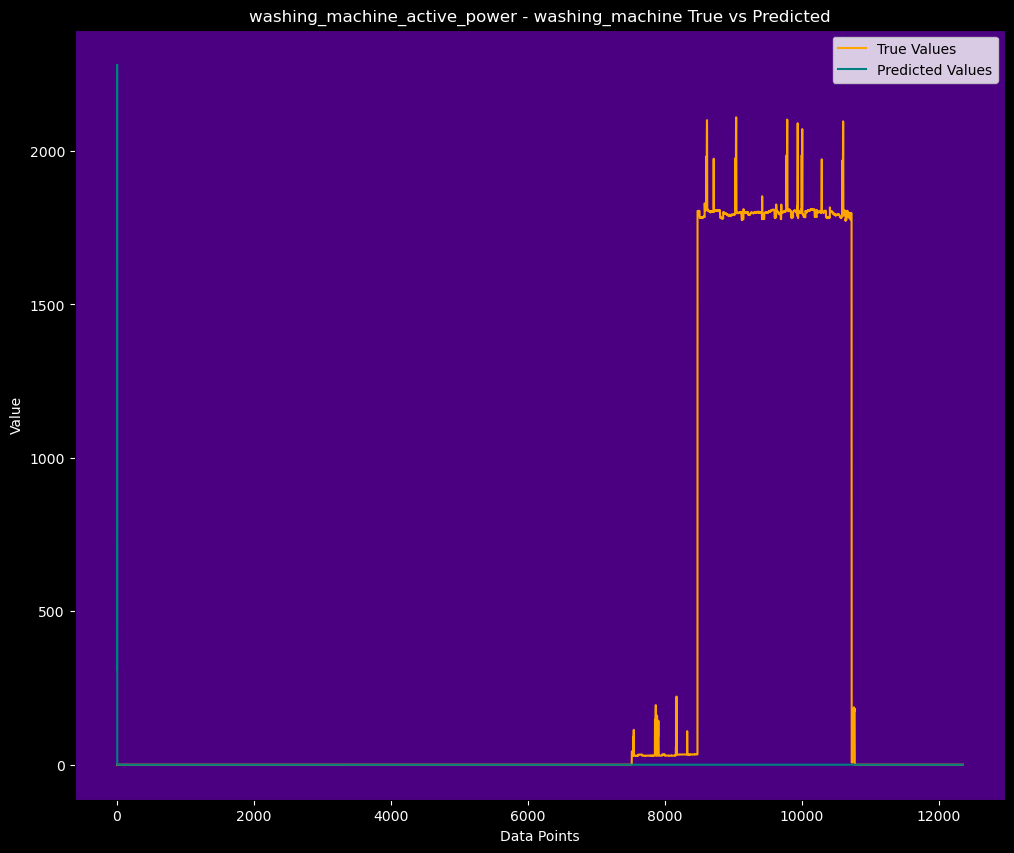

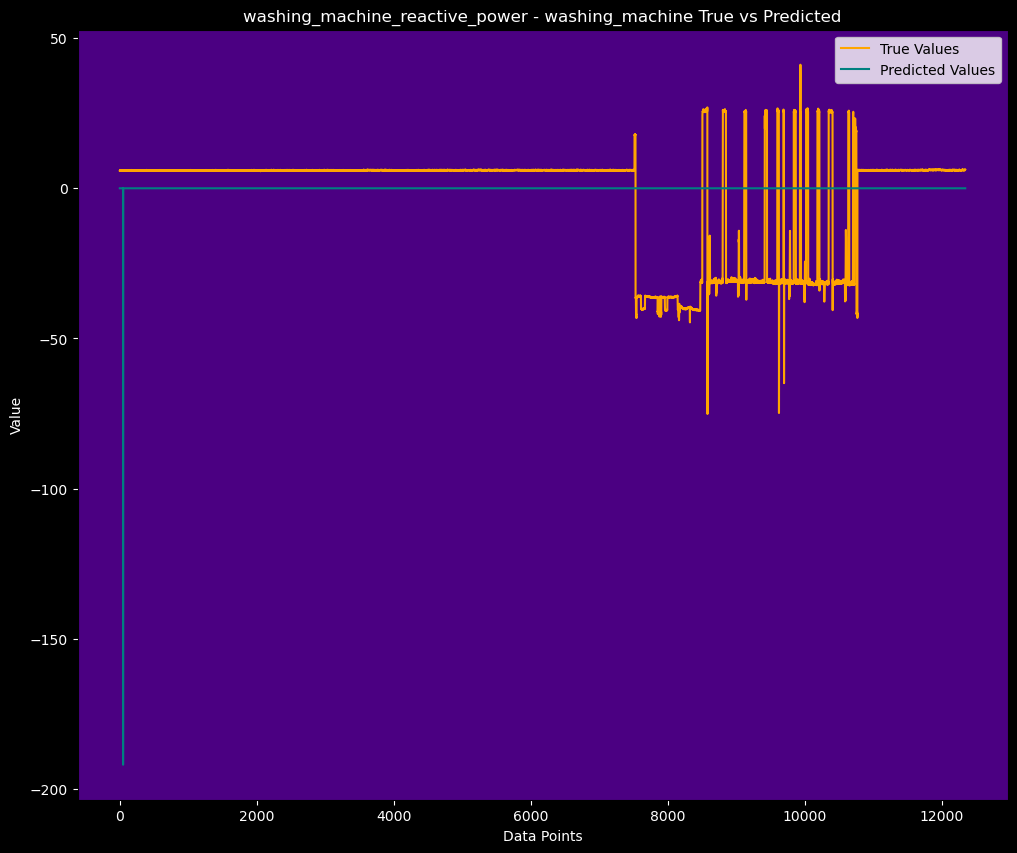

In [12]:
## WASHING MACHINE ##

X_train_washing_machine, X_test_washing_machine, Y_train_washing_machine, Y_test_washing_machine = washing_machine_train[total_features].values, washing_machine_test[total_features].values, washing_machine_train[washing_machine_features].values, washing_machine_test[washing_machine_features].values

hart85_disaggregator_washing_machine = Hart85(num_states=2, num_cluster_init=124, num_cycles_init=2, num_cluster=2)
hart85_disaggregator_washing_machine.train(X_train_washing_machine)

disaggregated_data_washing_machine = hart85_disaggregator_washing_machine.disaggregate(X_test_washing_machine)

for i, feature in enumerate(washing_machine_features):
    true_values = Y_test_washing_machine[:, i]
    pred_values = disaggregated_data_washing_machine[:, i]
    
    rmse = hart85_disaggregator_washing_machine.calculate_rmse(true_values, pred_values)
    mse = hart85_disaggregator_washing_machine.calculate_mse(true_values, pred_values)
    rmae = hart85_disaggregator_washing_machine.calculate_rmae(true_values, pred_values)
    mae = hart85_disaggregator_washing_machine.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()
    
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_washing_machine.shape[1]):
    column_name = washing_machine_features[i]
    column_true = Y_test_washing_machine[:, i]
    column_pred = disaggregated_data_washing_machine[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='teal')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - washing_machine True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('indigo')
    
    plt.show()


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for microwave_active_power:
RMSE: 19.08828744189104
MSE: 364.36271746425524
RMAE: 25.51751584493823
MAE: 0.9271435848247787
R2: -1204.8348501778144

Metrics for microwave_reactive_power:
RMSE: 2.4291132771612123
MSE: 5.900591313280885
RMAE: -1.5923735740504885
MAE: 1.549616221763576
R2: -705.1898576127446



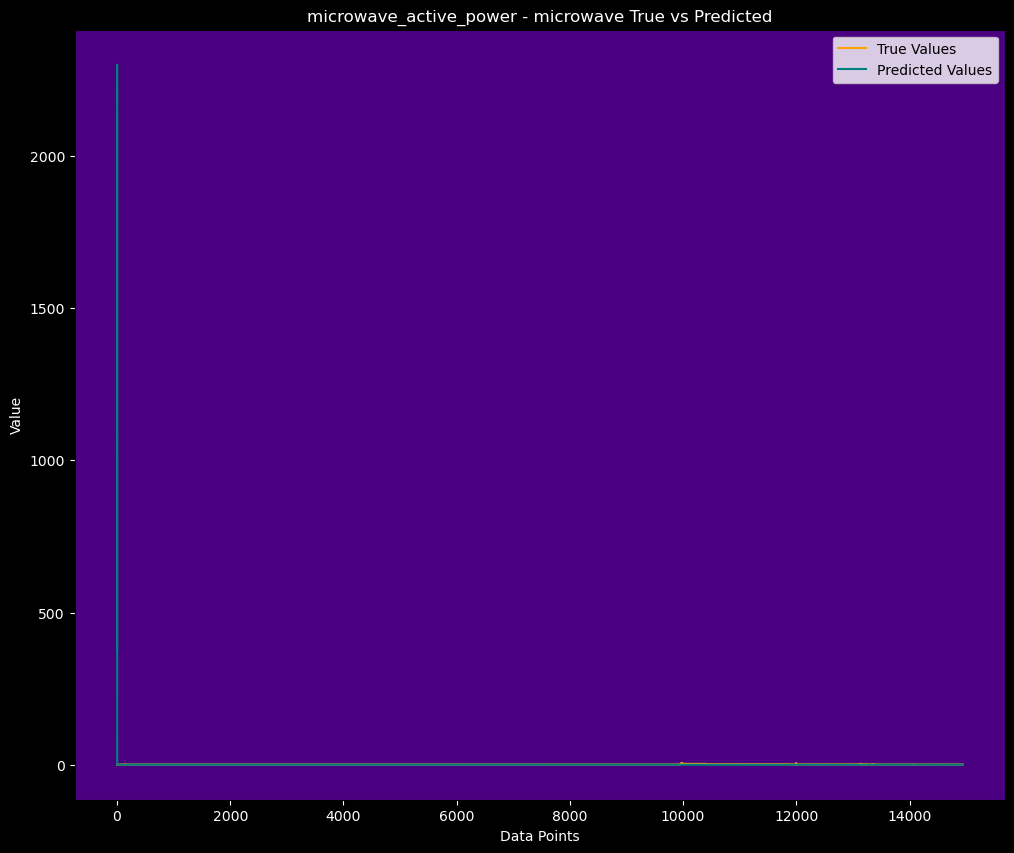

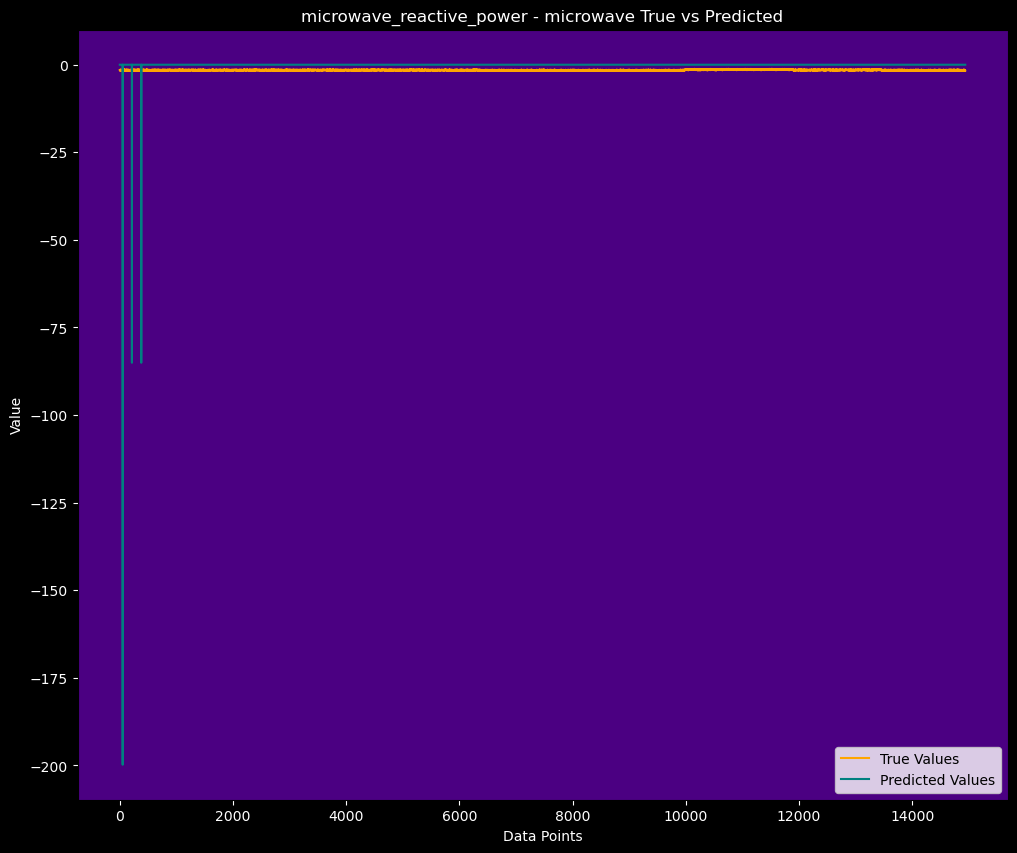

In [13]:

## MICROWAVE ##

X_train_microwave, X_test_microwave, Y_train_microwave, Y_test_microwave = microwave_train[total_features].values, microwave_test[total_features].values, microwave_train[microwave_features].values, microwave_test[microwave_features].values

hart85_disaggregator_microwave = Hart85(num_states=2, num_cluster_init=124, num_cycles_init=2, num_cluster=2)
hart85_disaggregator_microwave.train(X_train_microwave)

disaggregated_data_microwave = hart85_disaggregator_microwave.disaggregate(X_test_microwave)

for i, feature in enumerate(microwave_features):
    true_values = Y_test_microwave[:, i]
    pred_values = disaggregated_data_microwave[:, i]
    
    rmse = hart85_disaggregator_microwave.calculate_rmse(true_values, pred_values)
    mse = hart85_disaggregator_microwave.calculate_mse(true_values, pred_values)
    rmae = hart85_disaggregator_microwave.calculate_rmae(true_values, pred_values)
    mae = hart85_disaggregator_microwave.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()
    
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_microwave.shape[1]):
    column_name = microwave_features[i]
    column_true = Y_test_microwave[:, i]
    column_pred = disaggregated_data_microwave[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='teal')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - microwave True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('indigo')
    
    plt.show()


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for rice_cooker_active_power:
RMSE: 6.0925219467399145
MSE: 37.11882367150752
RMAE: 25.7992253476983
MAE: 0.2981585945844681
R2: -10884.730503653711

Metrics for rice_cooker_reactive_power:
RMSE: 0.0608411510619861
MSE: 0.0037016456625474123
RMAE: -7.056761904911834
MAE: 0.04841734981035116
R2: -0.020492689930774244



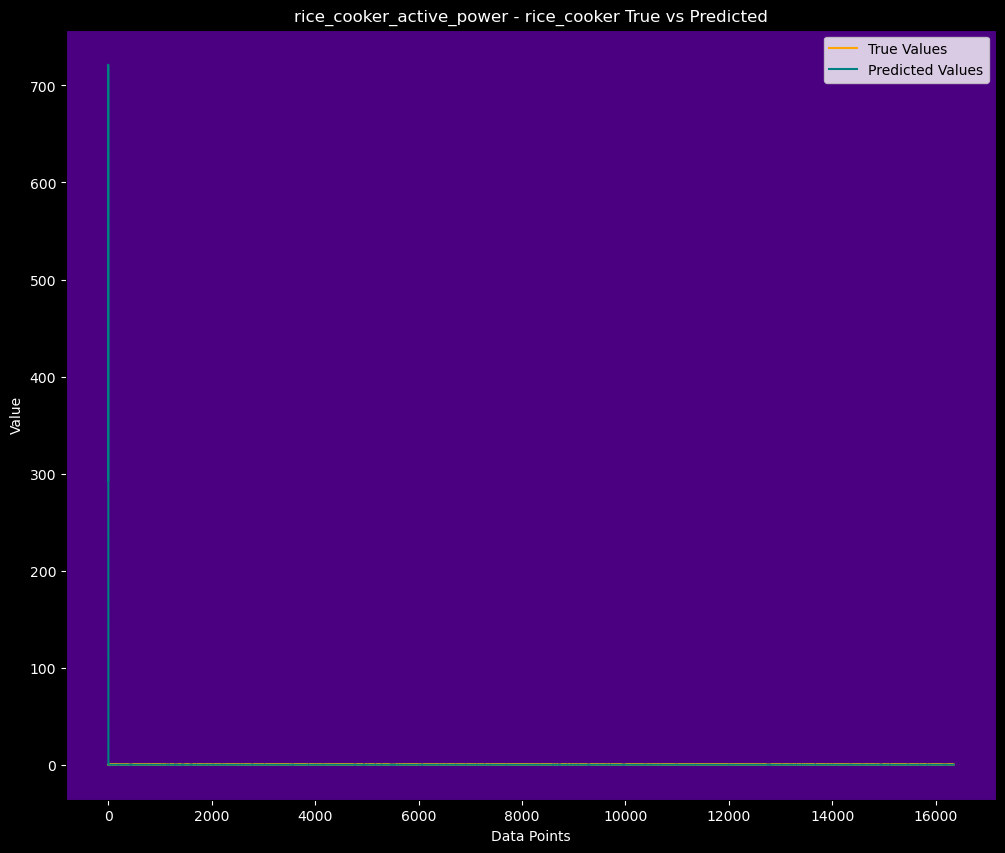

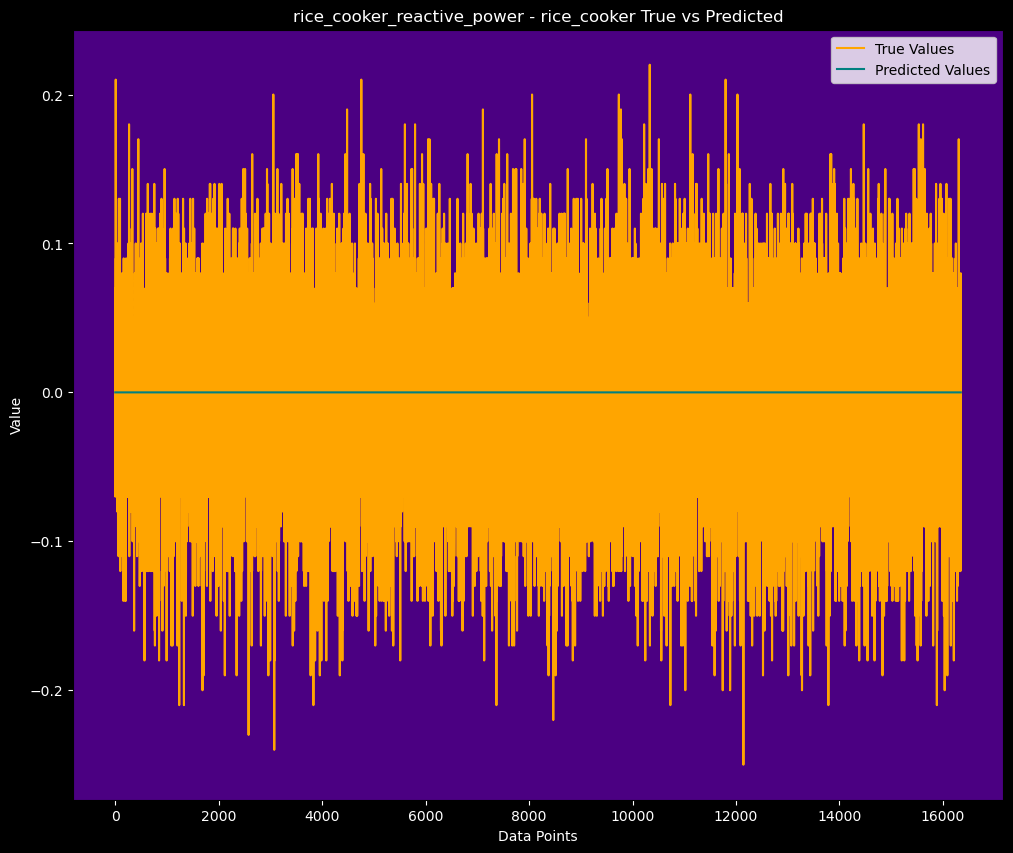

In [14]:
## RICE COOKER ##


## rice_cooker ##

X_train_rice_cooker, X_test_rice_cooker, Y_train_rice_cooker, Y_test_rice_cooker = rice_cooker_train[total_features].values, rice_cooker_test[total_features].values, rice_cooker_train[rice_cooker_features].values, rice_cooker_test[rice_cooker_features].values

hart85_disaggregator_rice_cooker = Hart85(num_states=2, num_cluster_init=124, num_cycles_init=2, num_cluster=2)
hart85_disaggregator_rice_cooker.train(X_train_rice_cooker)

disaggregated_data_rice_cooker = hart85_disaggregator_rice_cooker.disaggregate(X_test_rice_cooker)

for i, feature in enumerate(rice_cooker_features):
    true_values = Y_test_rice_cooker[:, i]
    pred_values = disaggregated_data_rice_cooker[:, i]
    
    rmse = hart85_disaggregator_rice_cooker.calculate_rmse(true_values, pred_values)
    mse = hart85_disaggregator_rice_cooker.calculate_mse(true_values, pred_values)
    rmae = hart85_disaggregator_rice_cooker.calculate_rmae(true_values, pred_values)
    mae = hart85_disaggregator_rice_cooker.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()
    
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_rice_cooker.shape[1]):
    column_name = rice_cooker_features[i]
    column_true = Y_test_rice_cooker[:, i]
    column_pred = disaggregated_data_rice_cooker[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='teal')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - rice_cooker True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('indigo')
    
    plt.show()


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for tv_active_power:
RMSE: 5.703420363503842
MSE: 32.52900384283029
RMAE: 28.852194231023688
MAE: 0.2700553312246093
R2: -8872.35836218686

Metrics for tv_reactive_power:
RMSE: 1.7887343081480385
MSE: 3.199570425145842
RMAE: 1.0028143785683277
MAE: 1.784655171551595
R2: -754.6472775236524



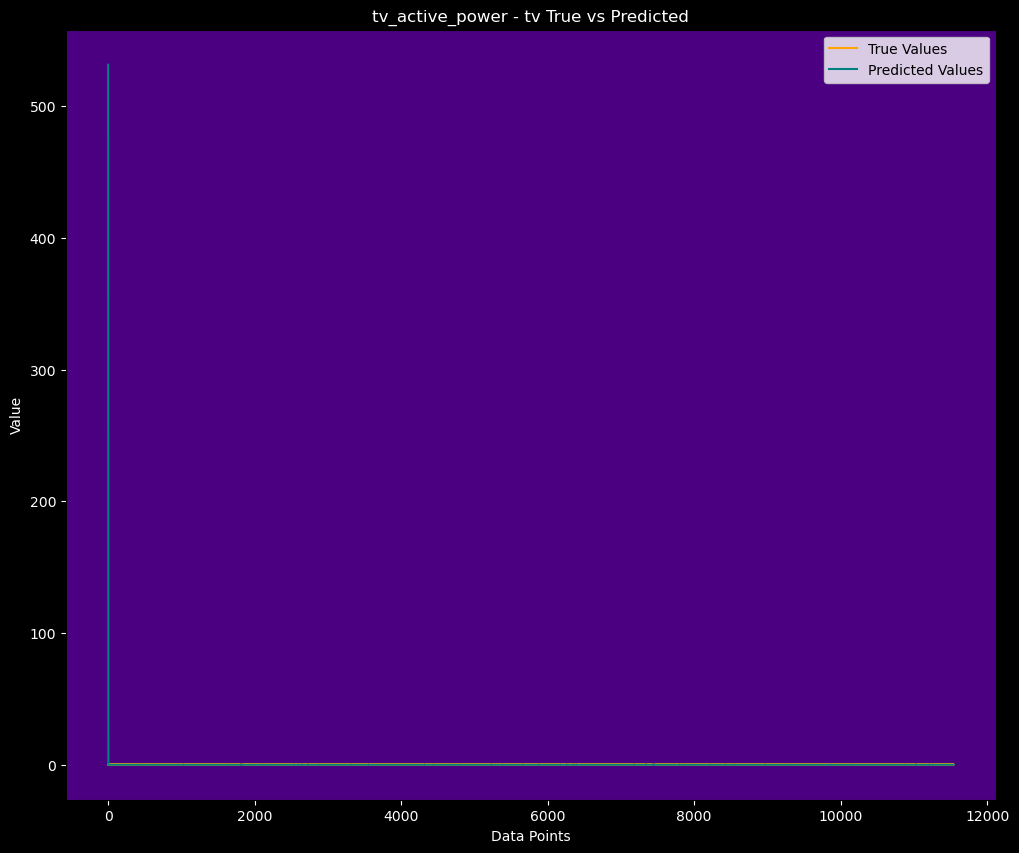

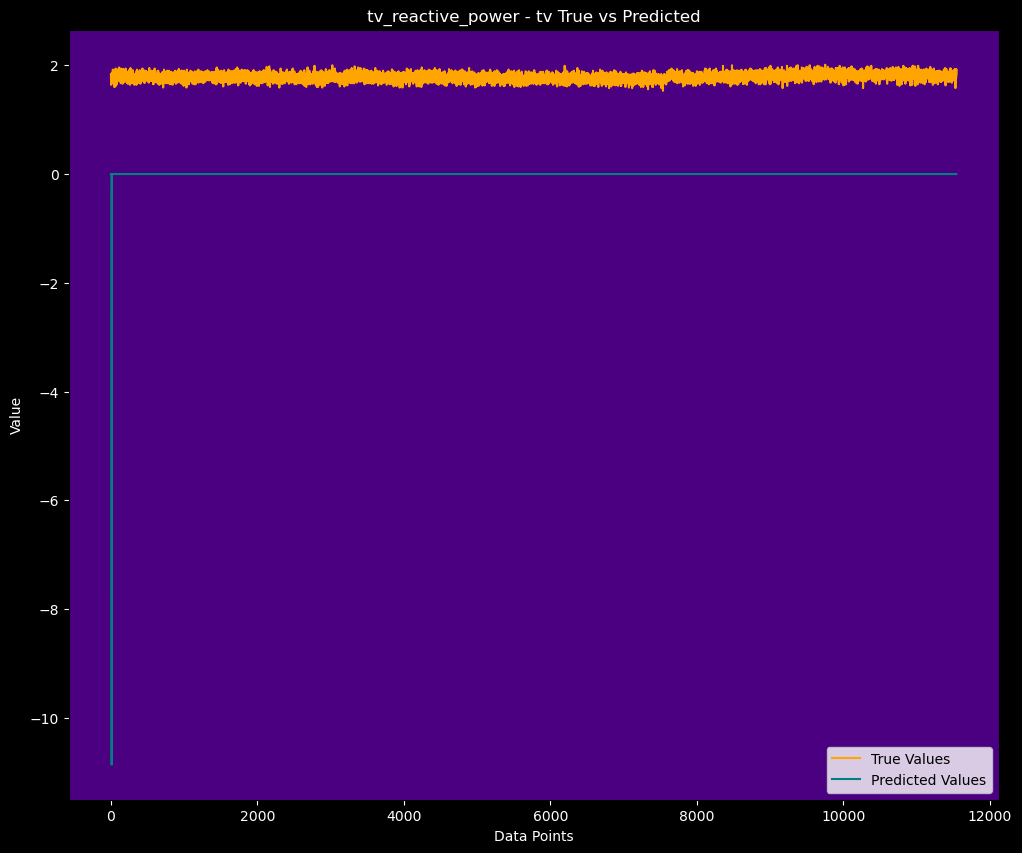

In [15]:

## TV ##

X_train_tv, X_test_tv, Y_train_tv, Y_test_tv = tv_train[total_features].values, tv_test[total_features].values, tv_train[tv_features].values, tv_test[tv_features].values

hart85_disaggregator_tv = Hart85(num_states=2, num_cluster_init=124, num_cycles_init=2, num_cluster=2)
hart85_disaggregator_tv.train(X_train_tv)

disaggregated_data_tv = hart85_disaggregator_tv.disaggregate(X_test_tv)

for i, feature in enumerate(tv_features):
    true_values = Y_test_tv[:, i]
    pred_values = disaggregated_data_tv[:, i]
    
    rmse = hart85_disaggregator_tv.calculate_rmse(true_values, pred_values)
    mse = hart85_disaggregator_tv.calculate_mse(true_values, pred_values)
    rmae = hart85_disaggregator_tv.calculate_rmae(true_values, pred_values)
    mae = hart85_disaggregator_tv.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()
    
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_tv.shape[1]):
    column_name = tv_features[i]
    column_true = Y_test_tv[:, i]
    column_pred = disaggregated_data_tv[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='teal')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - tv True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('indigo')
    
    plt.show()


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for water_pur_active_power:
RMSE: 67.86413204385207
MSE: 4605.5404180653895
RMAE: 1.3574928495589766
MAE: 50.236803208289246
R2: -1.994777112505051

Metrics for water_pur_reactive_power:
RMSE: 98.68994946668307
MSE: 9739.70612573646
RMAE: 1.2578095033151837
MAE: 78.49872441647162
R2: -1.7259897379479545



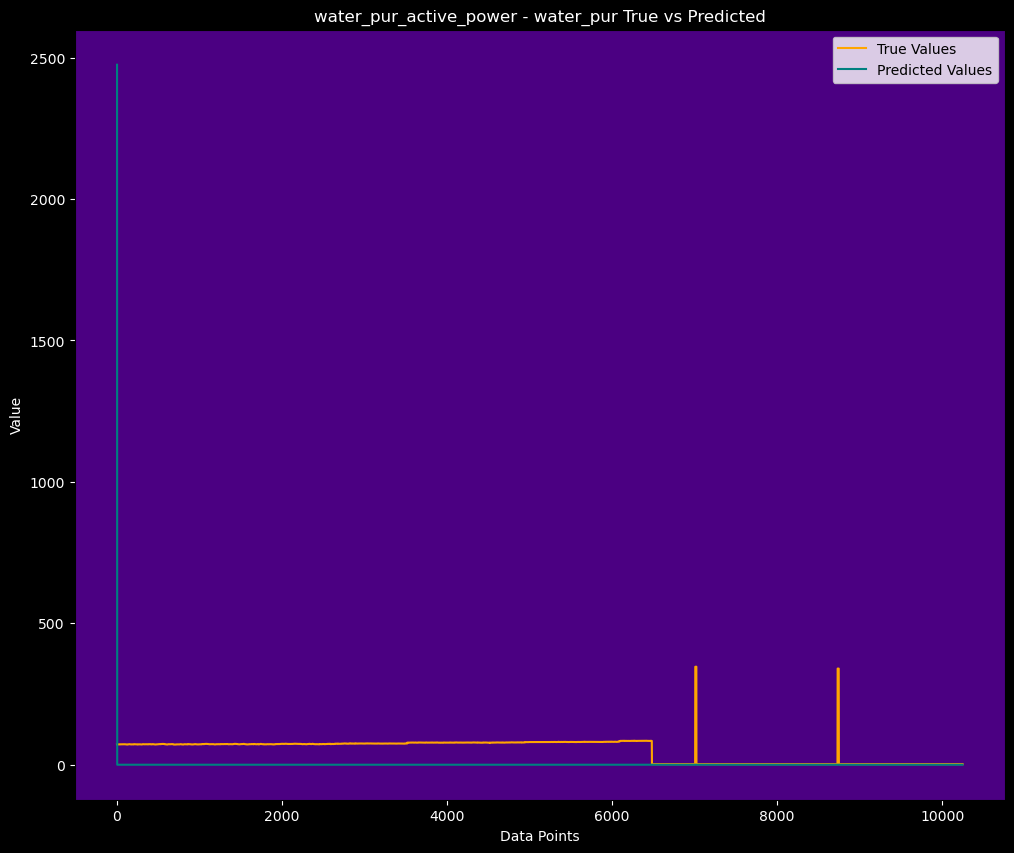

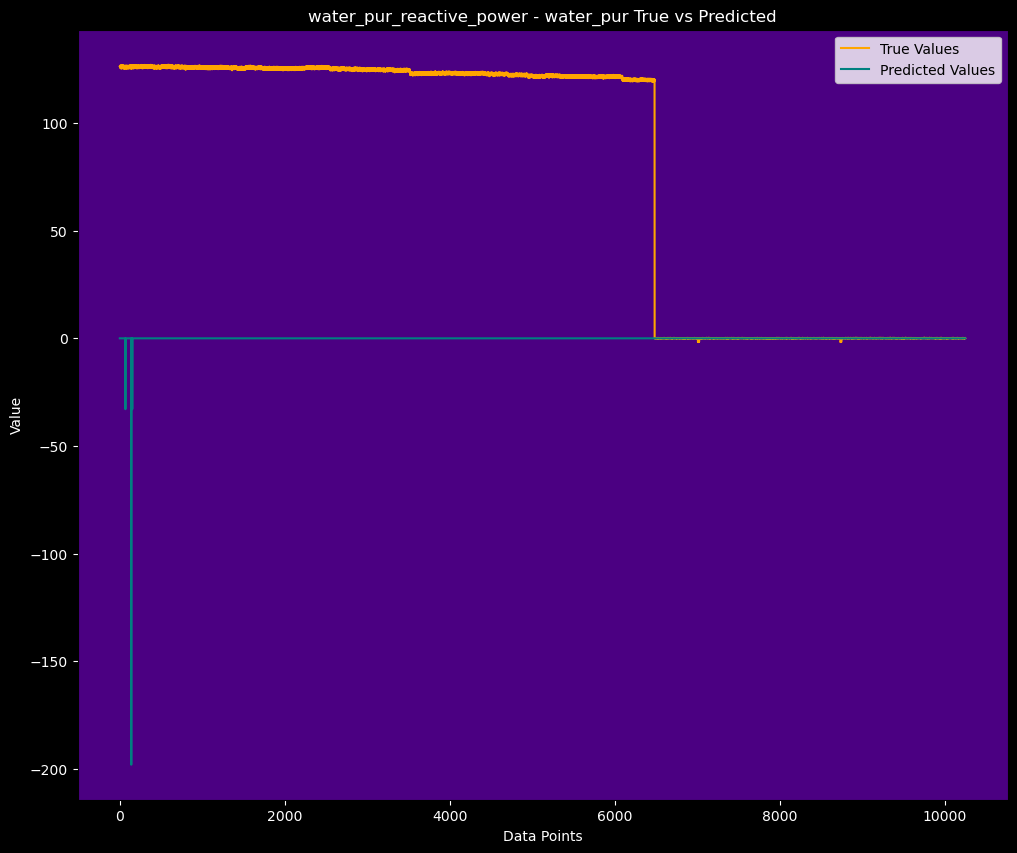

In [16]:

## water_pur ##

X_train_water_pur, X_test_water_pur, Y_train_water_pur, Y_test_water_pur = water_pur_train[total_features].values, water_pur_test[total_features].values, water_pur_train[water_pur_features].values, water_pur_test[water_pur_features].values

hart85_disaggregator_water_pur = Hart85(num_states=2, num_cluster_init=124, num_cycles_init=2, num_cluster=2)
hart85_disaggregator_water_pur.train(X_train_water_pur)

disaggregated_data_water_pur = hart85_disaggregator_water_pur.disaggregate(X_test_water_pur)

for i, feature in enumerate(water_pur_features):
    true_values = Y_test_water_pur[:, i]
    pred_values = disaggregated_data_water_pur[:, i]
    
    rmse = hart85_disaggregator_water_pur.calculate_rmse(true_values, pred_values)
    mse = hart85_disaggregator_water_pur.calculate_mse(true_values, pred_values)
    rmae = hart85_disaggregator_water_pur.calculate_rmae(true_values, pred_values)
    mae = hart85_disaggregator_water_pur.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()
    
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_water_pur.shape[1]):
    column_name = water_pur_features[i]
    column_true = Y_test_water_pur[:, i]
    column_pred = disaggregated_data_water_pur[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='teal')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - water_pur True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('indigo')
    
    plt.show()


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for kimchi_fridge_active_power:
RMSE: 42.9113190769669
MSE: 1841.381304925263
RMAE: 5.330986163789155
MAE: 8.134017402195527
R2: -0.0711469227603232

Metrics for kimchi_fridge_reactive_power:
RMSE: 20.185907532022163
MSE: 407.4708628913491
RMAE: -49.517634089476736
MAE: 6.266759887207309
R2: -0.001387977418980224



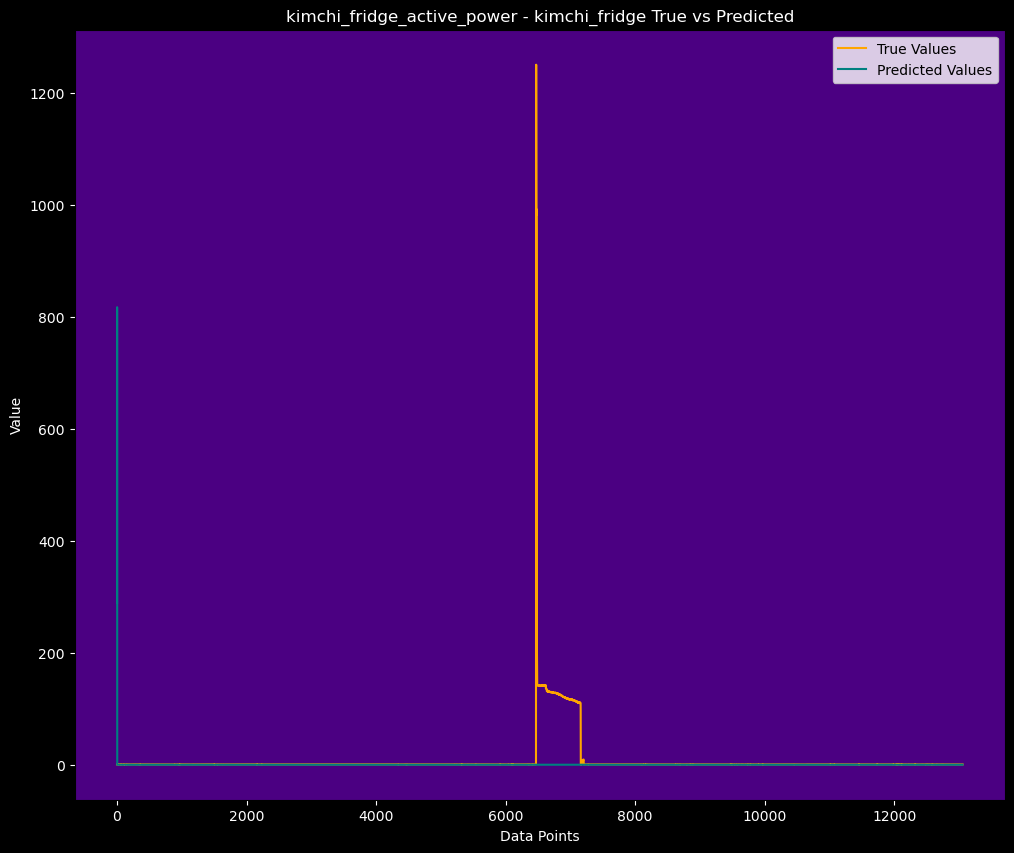

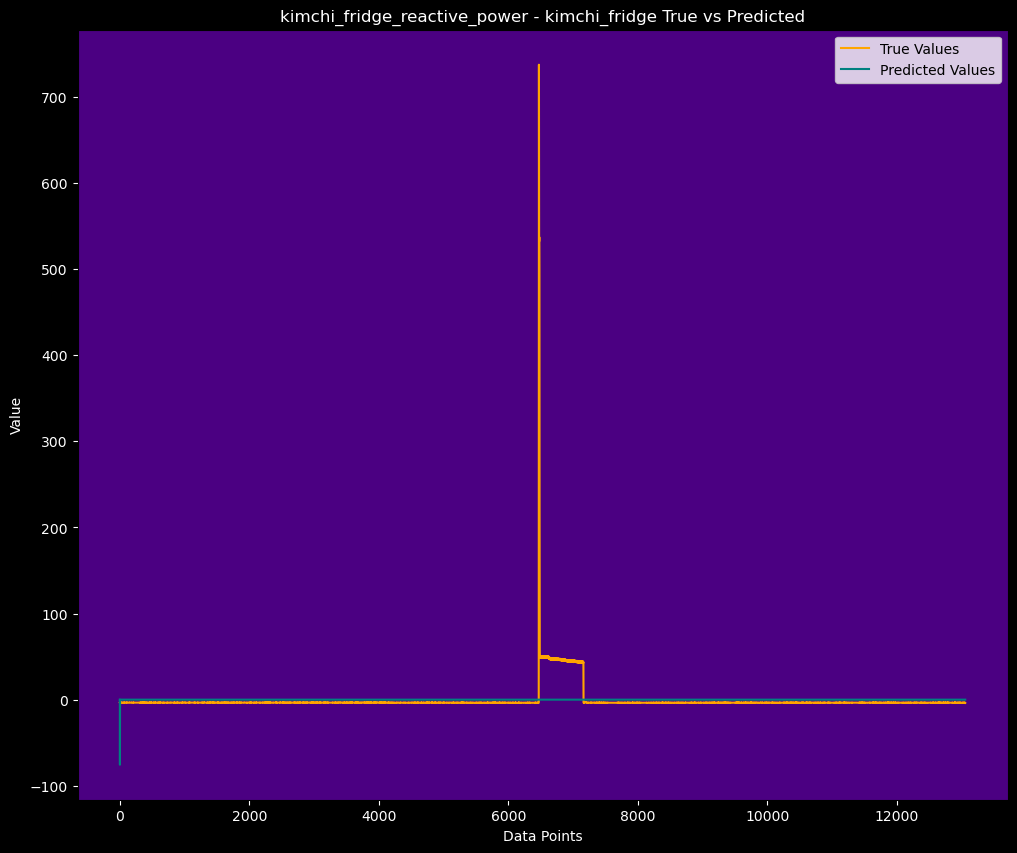

In [17]:

## kimchi_fridge ##

X_train_kimchi_fridge, X_test_kimchi_fridge, Y_train_kimchi_fridge, Y_test_kimchi_fridge = kimchi_fridge_train[total_features].values, kimchi_fridge_test[total_features].values, kimchi_fridge_train[kimchi_fridge_features].values, kimchi_fridge_test[kimchi_fridge_features].values

hart85_disaggregator_kimchi_fridge = Hart85(num_states=2, num_cluster_init=124, num_cycles_init=2, num_cluster=2)
hart85_disaggregator_kimchi_fridge.train(X_train_kimchi_fridge)

disaggregated_data_kimchi_fridge = hart85_disaggregator_kimchi_fridge.disaggregate(X_test_kimchi_fridge)

for i, feature in enumerate(kimchi_fridge_features):
    true_values = Y_test_kimchi_fridge[:, i]
    pred_values = disaggregated_data_kimchi_fridge[:, i]
    
    rmse = hart85_disaggregator_kimchi_fridge.calculate_rmse(true_values, pred_values)
    mse = hart85_disaggregator_kimchi_fridge.calculate_mse(true_values, pred_values)
    rmae = hart85_disaggregator_kimchi_fridge.calculate_rmae(true_values, pred_values)
    mae = hart85_disaggregator_kimchi_fridge.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()
    
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_kimchi_fridge.shape[1]):
    column_name = kimchi_fridge_features[i]
    column_true = Y_test_kimchi_fridge[:, i]
    column_pred = disaggregated_data_kimchi_fridge[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='teal')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - kimchi_fridge True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('indigo')
    
    plt.show()
